In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import datetime as dt

----
### Import CSVs from Whoop

In [4]:
physio = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/physiological_cycles.csv')

In [91]:
physio.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %'],
      dtype='object')

In [5]:
physio.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
0,2022-11-28 01:03:57,NaN,UTC+01:00,65.0,61.0,56.0,33.20,97.67,NaN,NaN,...,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,...,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,...,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,...,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,...,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0


In [141]:
physio.shape

(679, 25)

In [143]:
sleep = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/sleeps.csv')

In [144]:
sleep.shape

(712, 17)

In [146]:
sleep.head()

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap
0,2022-11-28 01:03:57,NaN,UTC+01:00,2022-11-28 01:03:57,2022-11-28 08:11:16,76.0,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,False
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,2022-11-27 03:18:18,2022-11-27 10:52:02,76.0,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,False
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,2022-11-26 03:51:55,2022-11-26 11:36:43,80.0,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,False
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-25 03:24:54,2022-11-25 11:58:44,87.0,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,False
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,2022-11-24 03:17:20,2022-11-24 11:59:53,90.0,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,False


In [8]:
workout = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/workouts.csv')

In [147]:
workout.shape

(133, 20)

In [94]:
workout.dtypes

Cycle start time             object
Cycle end time               object
Cycle timezone               object
Workout start time           object
Workout end time             object
Duration (min)                int64
Activity name                object
Activity Strain             float64
Energy burned (cal)         float64
Max HR (bpm)                float64
Average HR (bpm)            float64
HR Zone 1 %                 float64
HR Zone 2 %                 float64
HR Zone 3 %                 float64
HR Zone 4 %                 float64
HR Zone 5 %                 float64
GPS enabled                    bool
Distance (meters)           float64
Altitude gain (meters)      float64
Altitude change (meters)    float64
dtype: object

In [149]:
workout.loc[workout['Activity name'] == 'Gaming'].head()

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
10,2022-09-04 22:50:01,2022-09-06 01:47:26,UTC+03:00,2022-09-05 18:49:17,2022-09-05 20:25:07,95,Gaming,7.1,330.0,141.0,107.0,23.0,38.0,37.0,0.0,0.0,False,NaN,NaN,NaN
54,2022-01-26 00:00:23,2022-01-27 00:10:51,UTC-05:00,2022-01-26 10:18:30,2022-01-26 11:42:08,83,Gaming,5.2,180.0,151.0,90.0,66.0,21.0,9.0,2.0,0.0,False,NaN,NaN,NaN
58,2021-12-24 03:19:34,2021-12-25 03:34:05,UTC+02:00,2021-12-24 23:23:16,2021-12-25 01:19:04,115,Gaming,12.2,729.0,180.0,120.0,10.0,25.0,34.0,24.0,5.0,False,NaN,NaN,NaN
62,2021-12-07 01:52:57,2021-12-08 02:46:47,UTC+02:00,2021-12-07 20:01:46,2021-12-07 22:27:29,145,Gaming,7.9,422.0,145.0,105.0,20.0,59.0,18.0,1.0,0.0,False,NaN,NaN,NaN
65,2021-12-04 02:58:58,2021-12-05 01:52:08,UTC+02:00,2021-12-04 19:23:38,2021-12-04 21:42:47,139,Gaming,8.9,499.0,152.0,109.0,9.0,62.0,26.0,1.0,0.0,False,NaN,NaN,NaN


In [150]:
workout.head(10)

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-26 01:33:32,2022-11-26 02:02:47,29,Activity,8.4,284.0,159.0,140.0,0.0,1.0,35.0,62.0,0.0,False,NaN,NaN,NaN
1,2022-11-10 00:48:31,2022-11-10 23:39:33,UTC+01:00,2022-11-10 16:31:49,2022-11-10 17:20:04,48,Functional Fitness,8.3,335.0,172.0,127.0,0.0,16.0,60.0,18.0,4.0,False,NaN,NaN,NaN
2,2022-11-08 23:48:24,2022-11-10 00:48:31,UTC+01:00,2022-11-09 16:00:00,2022-11-09 17:00:00,60,Functional Fitness,9.7,431.0,188.0,128.0,0.0,22.0,49.0,20.0,5.0,False,NaN,NaN,NaN
3,2022-11-05 03:03:31,2022-11-06 00:38:48,UTC+01:00,2022-11-05 14:20:53,2022-11-05 15:35:49,74,Weightlifting,12.2,674.0,169.0,137.0,0.0,3.0,40.0,52.0,2.0,False,NaN,NaN,NaN
4,2022-10-29 00:19:26,2022-10-30 01:33:11,UTC+02:00,2022-10-29 19:58:53,2022-10-29 20:50:06,51,Running,11.2,475.0,191.0,138.0,0.0,3.0,41.0,31.0,20.0,False,NaN,NaN,NaN
5,2022-10-22 02:50:19,2022-10-23 03:18:23,UTC+02:00,2022-10-22 21:56:35,2022-10-22 22:45:51,49,Activity,10.2,445.0,172.0,138.0,1.0,3.0,28.0,57.0,8.0,False,NaN,NaN,NaN
6,2022-10-18 01:04:41,2022-10-19 00:35:54,UTC+02:00,2022-10-18 20:42:31,2022-10-18 21:44:56,62,Functional Fitness,11.4,531.0,187.0,137.0,0.0,17.0,22.0,44.0,14.0,False,NaN,NaN,NaN
7,2022-10-17 00:07:54,2022-10-18 01:04:41,UTC+02:00,2022-10-17 21:08:16,2022-10-17 21:26:59,18,Running,7.5,184.0,181.0,143.0,0.0,4.0,25.0,34.0,31.0,True,1891.35,40.24,-2.75
8,2022-10-03 02:02:48,2022-10-04 01:43:57,UTC+01:00,2022-10-03 20:06:00,2022-10-03 20:37:35,31,Cycling,8.7,308.0,166.0,141.0,0.0,4.0,14.0,77.0,3.0,False,NaN,NaN,NaN
9,2022-09-07 01:15:28,2022-09-07 23:59:02,UTC+03:00,2022-09-07 18:16:56,2022-09-07 19:21:37,64,Swimming,10.8,540.0,169.0,135.0,0.0,3.0,38.0,53.0,3.0,False,NaN,NaN,NaN


----
### Import XMLs from Apple Health

In [10]:
# create element tree object 
tree = ET.parse(r'/Users/tinym/Desktop/apple_health_export/export.xml') 

# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()

In [11]:
record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')


In [38]:
# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')
data.head()


,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
0,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
1,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
2,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
3,BodyMassIndex,Lifesum,1,NaN,count,2022-06-16 18:27:17+01:00,2022-06-16 13:22:23+01:00,2022-06-16 13:22:23+01:00,24.1478
4,Height,JEFIT,1449,NaN,ft,2020-02-25 07:25:44+01:00,2020-02-25 07:25:44+01:00,2020-02-25 07:25:44+01:00,5.8750


In [43]:
data.type.unique()

array(['BodyMassIndex', 'Height', 'BodyMass', 'HeartRate',
       'OxygenSaturation', 'RespiratoryRate', 'BodyFatPercentage',
       'LeanBodyMass', 'StepCount', 'DistanceWalkingRunning',
       'BasalEnergyBurned', 'ActiveEnergyBurned', 'FlightsClimbed',
       'DietaryFatTotal', 'DietaryFatMonounsaturated',
       'DietaryFatSaturated', 'DietaryCholesterol', 'DietarySodium',
       'DietaryCarbohydrates', 'DietaryFiber', 'DietarySugar',
       'DietaryEnergyConsumed', 'DietaryProtein', 'DietaryVitaminA',
       'DietaryVitaminB6', 'DietaryVitaminC', 'DietaryVitaminD',
       'DietaryVitaminE', 'DietaryVitaminK', 'DietaryCalcium',
       'DietaryIron', 'DietaryThiamin', 'DietaryRiboflavin',
       'DietaryNiacin', 'DietaryPhosphorus', 'DietaryMagnesium',
       'DietaryZinc', 'DietarySelenium', 'DietaryCopper',
       'DietaryManganese', 'DietaryPotassium', 'RestingHeartRate',
       'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',
       'WalkingSpeed', 'WalkingStepLength'

In [122]:
weight = data.loc[data.type == 'BodyMass']

<AxesSubplot:>

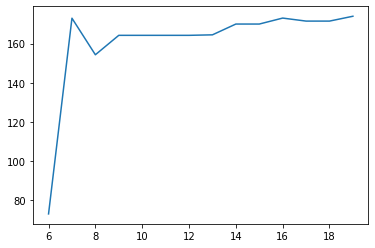

In [123]:
weight.value.plot()

In [116]:
rhr = data.loc[data.type == 'RestingHeartRate']

In [151]:
rhr.shape

(228, 9)

<AxesSubplot:>

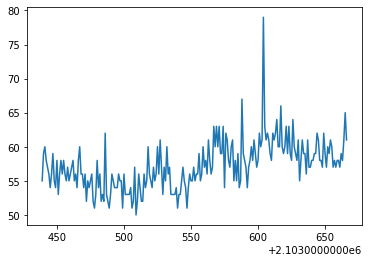

In [118]:
rhr.value.plot()

In [47]:
hr = data.loc[data.type == 'HeartRate']

In [152]:
hr.shape

(1960018, 9)

In [58]:
hr.dtypes

type                                           object
sourceName                                     object
sourceVersion                                  object
device                                         object
unit                                           object
creationDate     datetime64[ns, pytz.FixedOffset(60)]
startDate        datetime64[ns, pytz.FixedOffset(60)]
endDate          datetime64[ns, pytz.FixedOffset(60)]
value                                         float64
dtype: object

In [57]:
hr.sort_values(by='value', ascending=False)

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1951697,HeartRate,WHOOP,83866,NaN,count/min,2022-08-20 20:13:07+01:00,2022-08-20 18:57:59+01:00,2022-08-20 18:57:59+01:00,192.0
1951702,HeartRate,WHOOP,83866,NaN,count/min,2022-08-20 20:13:07+01:00,2022-08-20 18:58:33+01:00,2022-08-20 18:58:33+01:00,192.0
1957588,HeartRate,WHOOP,98900,NaN,count/min,2022-10-29 20:36:48+01:00,2022-10-29 19:29:26+01:00,2022-10-29 19:29:26+01:00,191.0
1951703,HeartRate,WHOOP,83866,NaN,count/min,2022-08-20 20:13:07+01:00,2022-08-20 18:58:40+01:00,2022-08-20 18:58:40+01:00,191.0
1951700,HeartRate,WHOOP,83866,NaN,count/min,2022-08-20 20:13:07+01:00,2022-08-20 18:58:20+01:00,2022-08-20 18:58:20+01:00,191.0
...,...,...,...,...,...,...,...,...,...
1147654,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:52:25+01:00,2021-10-07 09:52:24+01:00,2021-10-07 09:52:24+01:00,44.0
1147653,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:52:25+01:00,2021-10-07 09:52:23+01:00,2021-10-07 09:52:23+01:00,44.0
1149670,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281589a90>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:19:17+01:00,2021-10-07 10:19:17+01:00,2021-10-07 10:19:17+01:00,44.0
1147657,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:52:28+01:00,2021-10-07 09:52:27+01:00,2021-10-07 09:52:27+01:00,43.0


In [71]:
start = dt.datetime(2022,8,20,18,7,59)
finish = dt.datetime(2022,8,20,19,47,59)

In [87]:
start = dt.datetime(2021,10,7, 9,45,26)
finish = dt.datetime(2021,10,7, 10,2,26)

In [88]:
hr.startDate = hr.startDate.dt.tz_localize(None)

/Users/tinym/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [155]:
hr.loc[(hr.startDate >= np.datetime64(start)) & (hr.startDate <= np.datetime64(finish))]

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1147131,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158acb0>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:45:26+01:00,2021-10-07 09:45:26,2021-10-07 09:45:26+01:00,48.0
1147132,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158acb0>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:45:28+01:00,2021-10-07 09:45:27,2021-10-07 09:45:27+01:00,48.0
1147133,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158acb0>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:45:28+01:00,2021-10-07 09:45:28,2021-10-07 09:45:28+01:00,48.0
1147134,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158acb0>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:45:29+01:00,2021-10-07 09:45:28,2021-10-07 09:45:28+01:00,49.0
1147135,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158acb0>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:45:29+01:00,2021-10-07 09:45:29,2021-10-07 09:45:29+01:00,50.0
...,...,...,...,...,...,...,...,...,...
1148402,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:24+01:00,2021-10-07 10:02:23,2021-10-07 10:02:23+01:00,58.0
1148403,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:24+01:00,2021-10-07 10:02:23,2021-10-07 10:02:23+01:00,58.0
1148404,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:25+01:00,2021-10-07 10:02:24,2021-10-07 10:02:24+01:00,58.0
1148405,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:25+01:00,2021-10-07 10:02:25,2021-10-07 10:02:25+01:00,58.0


<AxesSubplot:>

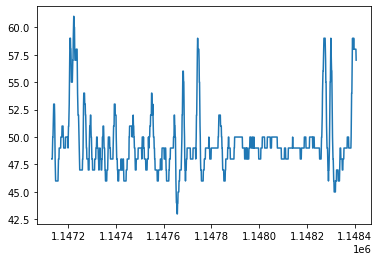

In [90]:
hr.loc[(hr.startDate >= np.datetime64(start)) & (hr.startDate <= np.datetime64(finish))].value.plot()

<AxesSubplot:>

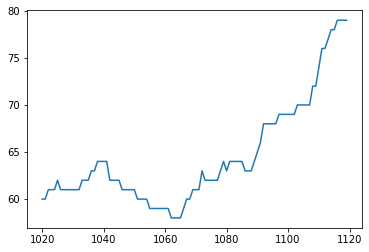

In [51]:
hr.value[1000:1].plot()

In [44]:
steps = data.loc[data.type == 'StepCount']

In [45]:
steps.head()

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1960500,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 03:07:35+01:00,2016-11-10 02:28:43+01:00,2016-11-10 02:37:22+01:00,90.0
1960501,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:34:20+01:00,2016-11-10 06:40:58+01:00,8.0
1960502,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:41:21+01:00,2016-11-10 06:50:20+01:00,136.0
1960503,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:50:20+01:00,2016-11-10 07:00:18+01:00,120.0
1960504,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 08:05:01+01:00,2016-11-10 07:00:18+01:00,2016-11-10 07:10:16+01:00,221.0


In [16]:
data.sourceName.unique()

array(['FitTrack', 'Lifesum', 'JEFIT', 'Panagiotis Syrgkanis’s iPhone',
       'Health', 'StrongLifts', 'iPhone', 'WHOOP', 'Freeletics',
       'Mealime', 'Clock', 'Pillow', 'Flow', 'FitMind'], dtype=object)